In [1]:
library(rstan)

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.2, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)



Inference for Stan model: 518eda5570cb89d5246e3a7028602e94.
3 chains, each with iter=10000; warmup=5000; thin=1; 
post-warmup draws per chain=5000, total post-warmup draws=15000.

           mean se_mean   sd      2.5%       25%       50%       75%     97.5%
mu       123.07    0.00 0.05    122.98    123.04    123.07    123.10    123.16
sigma      4.53    0.00 0.03      4.47      4.51      4.53      4.56      4.60
lp__  -20114.45    0.01 1.00 -20117.11 -20114.84 -20114.15 -20113.74 -20113.48
      n_eff Rhat
mu    11446    1
sigma 11667    1
lp__   6626    1

Samples were drawn using NUTS(diag_e) at Sun Dec 20 03:55:12 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
mu,123.068797,0.0004222928,0.04517843,122.980604,123.038352,123.069143,123.099603,123.156117,11445.505,0.9999818
sigma,4.534245,0.0002972317,0.03210455,4.470912,4.512496,4.534055,4.555887,4.598387,11666.556,1.0000503
lp__,-20114.452643,0.0122644924,0.99832835,-20117.106525,-20114.843859,-20114.147245,-20113.737072,-20113.479958,6625.942,0.9999329


ci_level: 0.8 (80% intervals)

outer_level: 0.95 (95% intervals)



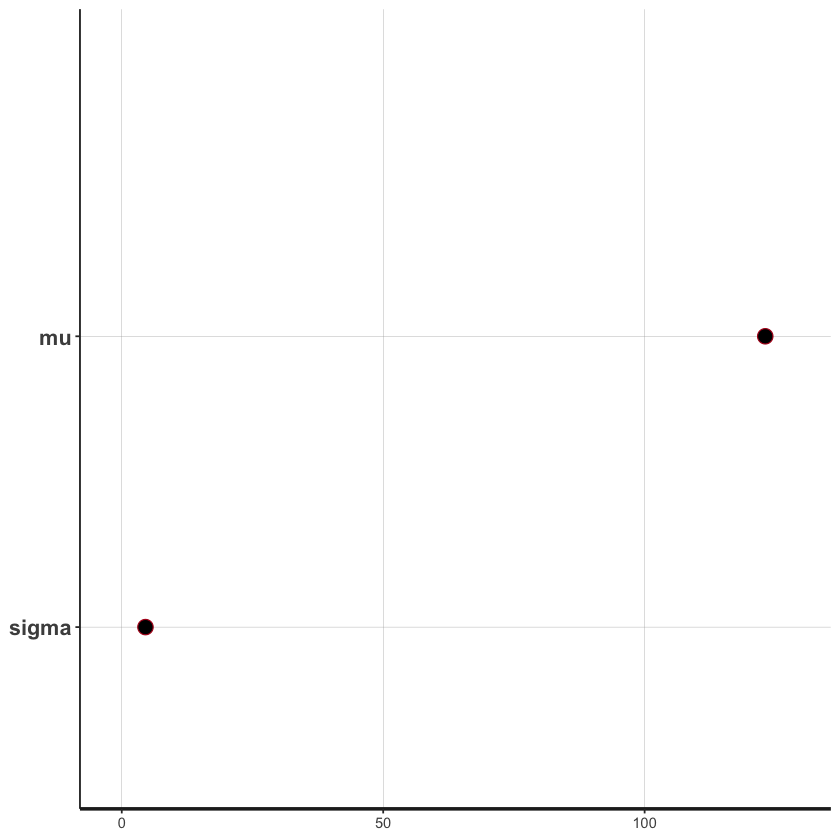

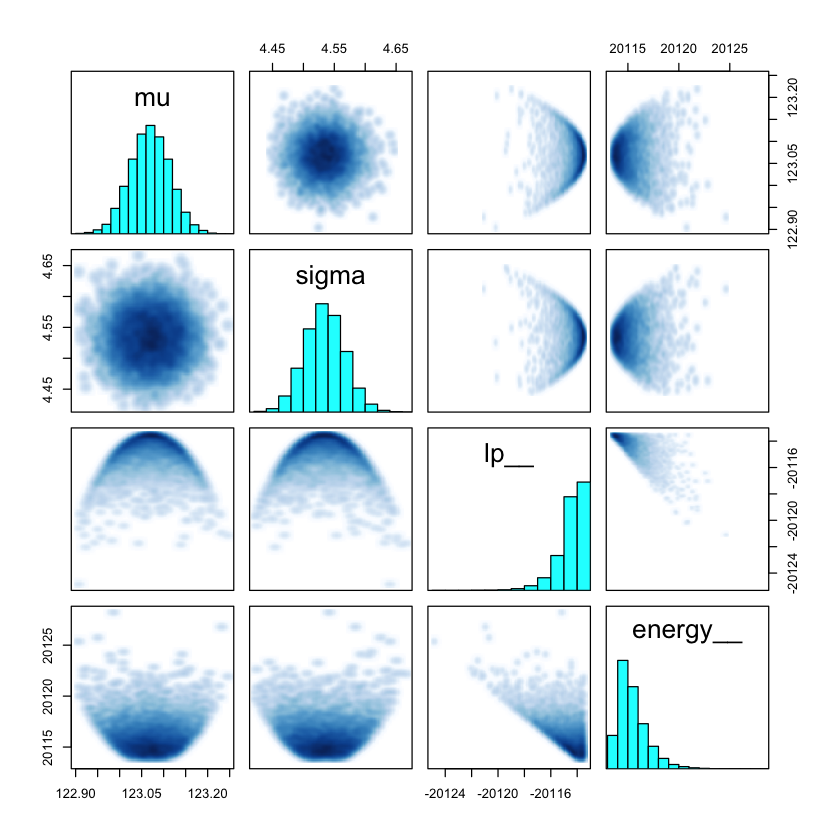

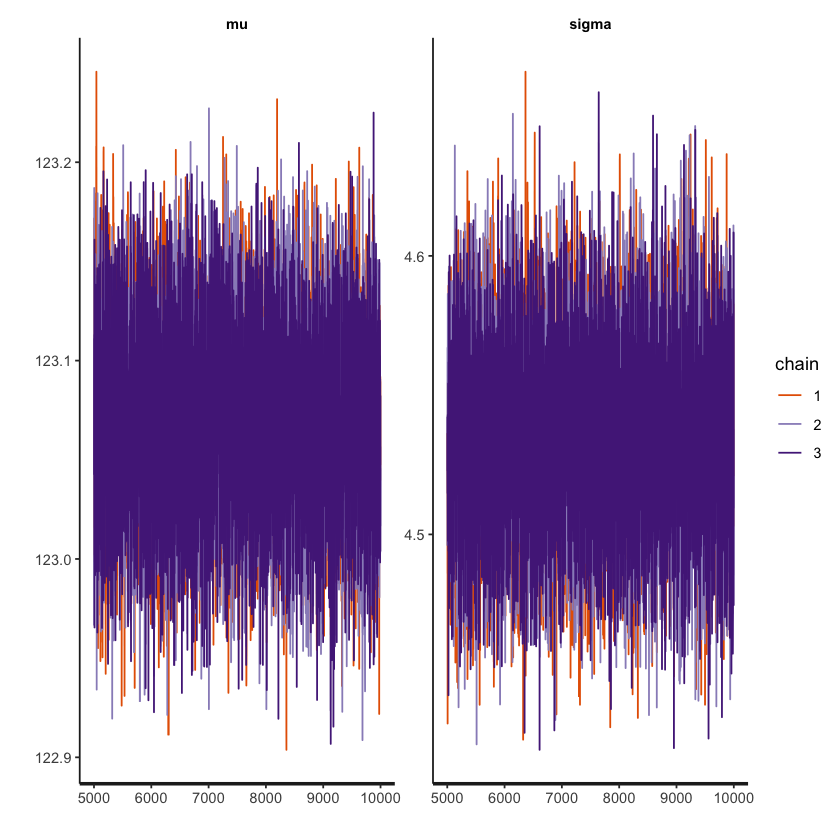

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



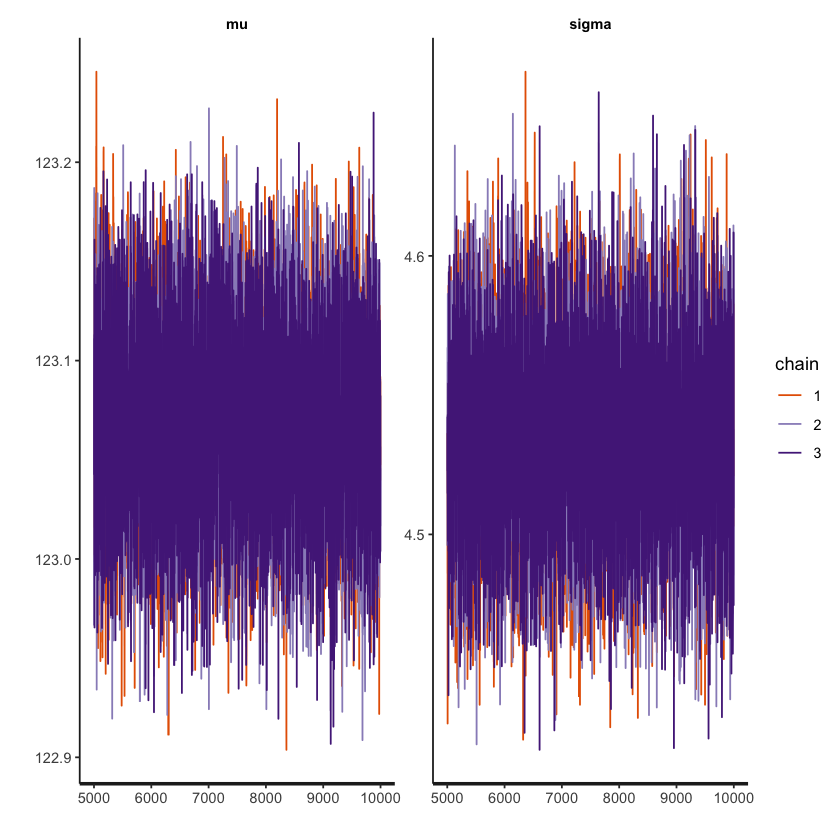

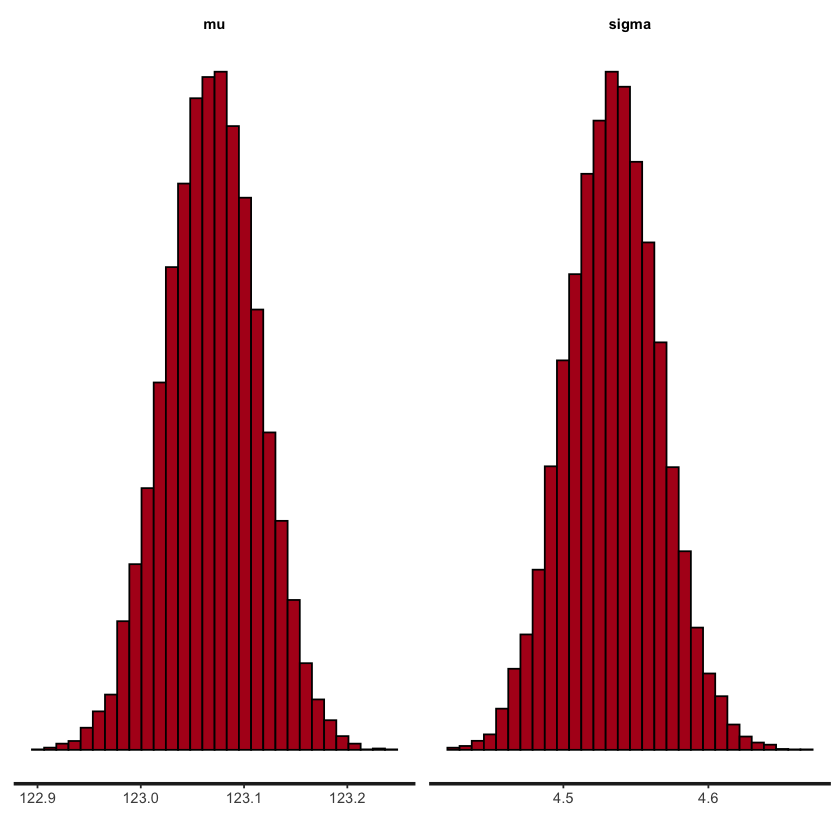

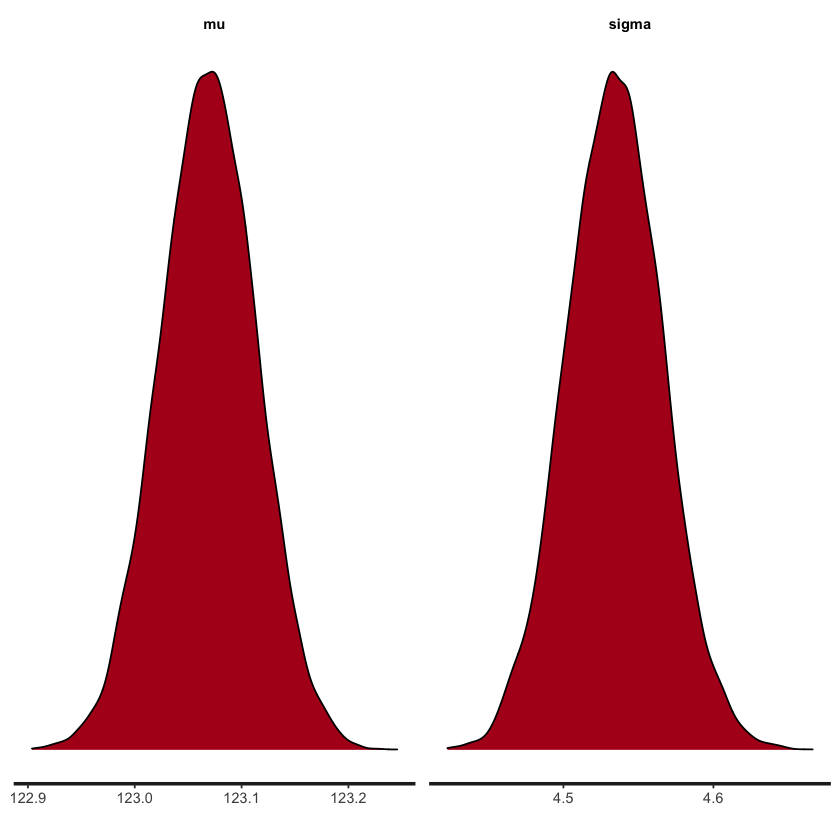

In [24]:
#https://heavywatal.github.io/rstats/stan.html

library(rstan)
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())

observation = list(x = rnorm(10000, 123, 4.5))
observation$length = length(observation$x)

stan_code = "
data {
  int length;
  real x[length];
}

parameters {
  real mu;
  real<lower=0> sigma;
}

model {
  x ~ normal(mu, sigma);
}"


mod = rstan::stan_model(model_code = stan_code)

fit = rstan::sampling(mod, data = observation, iter = 10000, chains = 3)

print(fit)
summary(fit)
plot(fit)
pairs(fit)
rstan::traceplot(fit)
rstan::stan_trace(fit)
rstan::stan_hist(fit)
rstan::stan_dens(fit)


